<a href="https://colab.research.google.com/github/SyedWaqar-ah/practiceInColab/blob/master/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Comment Classifier for IMDB dataset:
This  sequential FFNN is modelled for the binary classification of movie reviews dataset generated by IMDB. It contains 50,000 highly polarized reviews split into two 25,000 reviews sets for training and validation. The data is already processed and contains reviews in form of sequence of words transformed into integers (word_indices) associated in its dictionary. 

To start building the model we'll start with loading preliminaries;

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers

we'll also need some tools to plot our data and data handling

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now we call the data in respective vectors for training and testing. The vecotr ( )_data contains list of integers and vector ( )_labels contain integer 0 or 1. The parameter num_words(=10000) allows us to set the maximum number of most frequently occuring words, these will be included in processing rest will be discarded.

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#let us view whats inside these vectors
print(train_data[0])
print(train_labels[0])

17465344/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

In [4]:
# As Argument num_words restricts function to load only 10,000 most used words.
#To check we can execute the above snippet it will display the max word index in
#train_data
max([max(sequence) for sequence in train_data])

9999

Notice first the shape of training data and lengths of review vectors...

In [5]:
train_data.shape, len(train_data[0]), len(train_data[1])

((25000,), 218, 189)

the shape for the train_data identifies with only having 25000 elements while length of each review vector is different. We need to generate more sensible data with proper dimensions in the form of input tensors. 

#Sequence Vectorization:
This is one possible solution to feed input to the network. By vectorizing we will be one-hot encoding our lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then we could use it as the first layer in our network a Dense layer, capable of handling floating-point vector data.

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now creating a sequential model with one densely connected input, hidden and output layer each. Output layer has only one neuron wiht sigmoid nonlinear activation function to return probabilistic (0-1) results.

##Model and compilation:

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 103us/sample - loss: 0.4519 - acc: 0.8244 - val_loss: 0.3588 - val_acc: 0.8628
Epoch 2/20
25000/25000 [==============================] - 2s 90us/sample - loss: 0.2582 - acc: 0.9087 - val_loss: 0.3007 - val_acc: 0.8799
Epoch 3/20
25000/25000 [==============================] - 2s 90us/sample - loss: 0.1992 - acc: 0.9284 - val_loss: 0.3214 - val_acc: 0.8701
Epoch 4/20
25000/25000 [==============================] - 2s 89us/sample - loss: 0.1682 - acc: 0.9388 - val_loss: 0.2953 - val_acc: 0.8839
Epoch 5/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.1458 - acc: 0.9478 - val_loss: 0.3485 - val_acc: 0.8692
Epoch 6/20
25000/25000 [==============================] - 2s 88us/sample - loss: 0.1280 - acc: 0.9557 - val_loss: 0.3513 - val_acc: 0.8701
Epoch 7/20
25000/2500

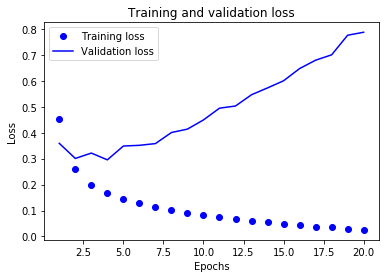

<Figure size 432x288 with 0 Axes>

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

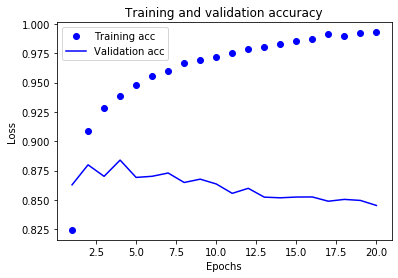

In [10]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()